<font color='red' size='5px'/> Data Preprocessing<font/>

<font color='blue' size='5px'/> Introduction<font/>

#  Overview 

We have decleared the dataset to be [Dataset](https://iplab.dmi.unict.it/Deepfakechallenge/). Now we want to choose how to perform preprocessing on this dataset. We've decided that we are going to split into two teams each team will be working with different methedology. The first will use Keras and the other will use Albumentations libarary

We want to use Data augmentation techniques to increase the size and diversity of a dataset by applying transformations to the existing data. This helps to prevent overfitting and improves the generalization of the model.

#  Literature Review

## 1 Models Used To detect DeepFake

1. XceptionNet: A deep learning model that is commonly used for deepfake detection, as it has shown high accuracy in identifying manipulated videos.

2. EfficientNet: Another deep learning model that is known for its high efficiency and accuracy in deepfake detection.

3. Capsule-Forensics: A model that uses a capsule network to extract features and identify manipulated videos based on the presence of anomalous patterns.

4. MesoNet: A deep learning model that uses mesoscopic features to identify manipulated videos.

5. FFD-Net: A model that uses a frequency-based approach to identify the presence of deepfake artifacts in manipulated videos.

6. Two-Stream Convolutional Neural Network (CNN): A model that uses a combination of spatial and temporal information to detect deepfake videos.

7. FaceForensics++: A dataset that contains a collection of videos that have been manipulated using different deepfake techniques. The dataset is commonly used for training and evaluating deepfake detection models.

8. DFDNet: A deep learning model that uses a fusion of deep and handcrafted features to detect manipulated videos.

In [ ]:
from IPython.display import Image

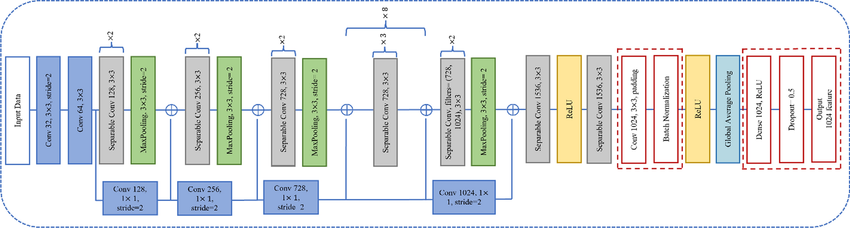

In [ ]:
Image('The-ameliorated-XceptionNet-architecture.png')

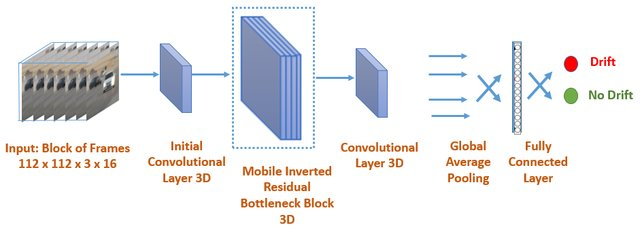

In [ ]:
Image('EfficientNet3D-B0-Architecture.jpg')

## 2 The Face Deepfake Detection Challenge Paper

### 1.1 Overview

1. Data Collection: The authors collected a large dataset of real and fake face images from various sources, including publicly available datasets and images generated using deepfake techniques.

2. Data Preparation: The dataset was split into training, validation, and testing sets. The authors also applied various data augmentation techniques to increase the size of the training set and improve the generalization of the model.

3. Baseline Model: The authors developed a baseline deep learning model for face detection using a combination of convolutional neural networks (CNNs) and recurrent neural networks (RNNs). The model was trained on the training set and evaluated on the validation set.

4. Challenge: The authors organized a challenge in which participants were asked to develop their own deepfake detection models and submit their results for evaluation. The challenge provided a platform for researchers to compare their methods and identify the most effective techniques.

5. Evaluation: The authors evaluated the performance of the participating models using various metrics, including precision, recall, and F1 score. They also compared the performance of the top-performing models with the baseline model.

<font color='blue' size='5px'/> Meeting to Implement VGG16<font/>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[All models with transfoer learning](https://keras.io/api/applications/)

when unzip you will dind data on content not drive

He performed some preprocessing again with image generator


Search on the topic of seed randomization

<font color='blue' size='5px'/>My trial to Implement in Project<font/>

# 1 Packages

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle
!cp "/content/drive/MyDrive/Colab Notebooks/AI Projects/2 Computer Vision/Deepfake Detection Omdena/kaggle.json" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import tensorflow as tf

In [ ]:
from keras.layers import Input,Dense, Flatten,Dropout,Conv2D,GlobalAveragePooling2D,MaxPool2D
from keras.models import Sequential
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB7

In [ ]:
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
import os
import random
import shutil

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'Abdelrahman Katkat'
os.environ['KAGGLE_KEY'] = 'your_kaggle_api_key'

# 2 Explore Data

$$ Test \ DeepFake \ and \ Real \ Data$$

In [ ]:
## Test DeepFake data
!unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Test_Data/Deepfake/AttGAN_Aug_Test.zip -d /content/drive/MyDrive/Data_collaction_Deepfake
!unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Test_Data/Deepfake/GDWCT_Aug_Test.zip -d /content/drive/MyDrive/Data_collaction_Deepfake 
!unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Test_Data/Deepfake/STYLEGAN2_Aug_Test.zip -d /content/drive/MyDrive/Data_collaction_Deepfake
!unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Test_Data/Deepfake/STYLEGAN_Aug_Test.zip -d /content/drive/MyDrive/Data_collaction_Deepfake
!unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Test_Data/Deepfake/StarGAN_Aug_Test.zip -d /content/drive/MyDrive/Data_collaction_Deepfake

Archive:  /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Test_Data/Deepfake/AttGAN_Aug_Test.zip
   creating: /content/drive/MyDrive/Data_collaction_Deepfake/content/AttGAN_Aug_Test/
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/content/AttGAN_Aug_Test/1_AttGAN_A_5009.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/content/AttGAN_Aug_Test/1_AttGAN_A_1303.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/content/AttGAN_Aug_Test/1_AttGAN_A_4772.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/content/AttGAN_Aug_Test/1_AttGAN_A_2920.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/content/AttGAN_Aug_Test/1_AttGAN_A_1266.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/content/AttGAN_Aug_Test/1_AttGAN_A_3258.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/content/AttGAN_Aug_Test/1_AttGAN_A_951.jpg  
  inflati

In [ ]:
# Unzip Real Data Test
!unzip  /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Test_Data/Real/CelebA_Aug_Test.zip -d /content/drive/MyDrive/Data_collaction_Deepfake
!unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Test_Data/Real/ffhq_aug_test.zip -d /content/drive/MyDrive/Data_collaction_Deepfake

In [ ]:
Deepfake_test_folder

['AttGAN_Aug_Test',
 'GDWCT_Aug_Test',
 'STYLEGAN2_Aug_Test',
 'STYLEGAN_Aug_Test',
 'StarGAN_Aug_Test',
 'CelebA_Aug_Test',
 'ffhq_aug_test',
 '.ipynb_checkpoints']

In [ ]:
Deepfake_test_folder=os.listdir('/content/drive/MyDrive/Data_collaction_Deepfake/Test/content')

for folder in Deepfake_test_folder:
 
  if folder=='AttGAN_Aug_Test' or folder=='GDWCT_Aug_Test'or folder=='STYLEGAN2_Aug_Test'or folder=='StarGAN_Aug_Test' or folder=='STYLEGAN_Aug_Test':   
    print(folder)
    # Set the random seed
    random.seed(0)
    
    # Source path and destination path
    src_folder='/content/drive/MyDrive/Data_collaction_Deepfake/Test/content'+'/'+folder
    dest_folder='/content/drive/MyDrive/Data_collaction_Deepfake/Merged_test/Deepfake'
    
    # Suffle Images
    image_files = [f for f in os.listdir(src_folder) ]
    random.shuffle(image_files)

    # Define number of Images to transfer
    percent_of_data=.1
    num_img=int(percent_of_data*len(image_files))
    selected_image_files = image_files[:num_img]

    # Transfer the selected images to the destination folder
    for filename in selected_image_files:
        src_path = os.path.join(src_folder, filename)
        dest_path = os.path.join(dest_folder, filename)
        shutil.copy(src_path, dest_path)
    
  elif folder=='ffhq_aug_test' or folder=='CelebA_Aug_Test':
    print(folder)
    # Set the random seed
    random.seed(0)
    
    # Source path and destination path
    src_folder='/content/drive/MyDrive/Data_collaction_Deepfake/Test/content'+'/'+folder
    dest_folder='/content/drive/MyDrive/Data_collaction_Deepfake/Merged_test/Real'
    
    # Suffle Images
    image_files = [f for f in os.listdir(src_folder) ]
    random.shuffle(image_files)

    # Define number of Images to transfer
    percent_of_data=.1
    num_img=int(percent_of_data*len(image_files))
    selected_image_files = image_files[:num_img]

    # Transfer the selected images to the destination folder
    for filename in selected_image_files:
        src_path = os.path.join(src_folder, filename)
        dest_path = os.path.join(dest_folder, filename)
        shutil.copy(src_path, dest_path)


AttGAN_Aug_Test
GDWCT_Aug_Test
STYLEGAN2_Aug_Test
STYLEGAN_Aug_Test
StarGAN_Aug_Test
CelebA_Aug_Test
ffhq_aug_test


In [ ]:
print(len(os.listdir('/content/drive/MyDrive/Data_collaction_Deepfake/Merged_test/Deepfake')))
print(len(os.listdir('/content/drive/MyDrive/Data_collaction_Deepfake/Merged_test/Real')))

297
300


$$ Train \ DeepFake \ and \ Real \ Data$$

In [ ]:
## Train DeepFake data
!unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Train_Data/Deepfake/AttGAN_Aug_Train.zip -d /content/drive/MyDrive/Data_collaction_Deepfake/content/Train 
!unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Train_Data/Deepfake/GDWCT_Aug_Train.zip -d /content/drive/MyDrive/Data_collaction_Deepfake/content/Train
!unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Train_Data/Deepfake/STYLEGAN2_Aug_Train.zip -d /content/drive/MyDrive/Data_collaction_Deepfake/content/Train
!unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Train_Data/Deepfake/STYLEGAN_Aug_Train.zip -d /content/drive/MyDrive/Data_collaction_Deepfake/content/Train
!unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Train_Data/Deepfake/StarGAN_Aug_Train.zip -d /content/drive/MyDrive/Data_collaction_Deepfake/content/Train

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/content/Train/STYLEGAN_Aug_Train/1_STYLEGAN_005756.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/content/Train/STYLEGAN_Aug_Train/1_STYLEGAN_005757.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/content/Train/STYLEGAN_Aug_Train/1_STYLEGAN_005758.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/content/Train/STYLEGAN_Aug_Train/1_STYLEGAN_005759.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/content/Train/STYLEGAN_Aug_Train/1_STYLEGAN_005760.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/content/Train/STYLEGAN_Aug_Train/1_STYLEGAN_005761.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/content/Train/STYLEGAN_Aug_Train/1_STYLEGAN_005762.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/content/Train/STYLEGAN_Aug_Train/1_STYLEGAN_005763.jpg  
  inf

In [ ]:
# Unzip Real Data train
!unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Train_Data/Real/CelebA_Aug_Train.zip -d /content/drive/MyDrive/Data_collaction_Deepfake/content/Train
!unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Train_Data/Real/ffhq_aug_train.zip -d /content/drive/MyDrive/Data_collaction_Deepfake/content/Train

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/content/Train/content/ffhq_aug_train/0_ffhq_augmented_8628.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/content/Train/content/ffhq_aug_train/0_ffhq_augmented_1367.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/content/Train/content/ffhq_aug_train/0_ffhq_augmented_6834.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/content/Train/content/ffhq_aug_train/0_ffhq_augmented_13810.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/content/Train/content/ffhq_aug_train/0_ffhq_augmented_12468.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/content/Train/content/ffhq_aug_train/0_ffhq_augmented_10787.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/content/Train/content/ffhq_aug_train/0_ffhq_augmented_7318.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/con

In [ ]:
Train_folder=os.listdir('/content/drive/MyDrive/Data_collaction_Deepfake/Train/content')
Train_folder

['AttGAN_Aug_Train',
 'GDWCT_Aug_Train',
 'STYLEGAN2_Aug_Train',
 'STYLEGAN_Aug_Train',
 'StarGAN_Aug_Train',
 '.ipynb_checkpoints',
 'CelebA_Aug_Train',
 'ffhq_aug_train']

In [ ]:
for folder in Train_folder:
 
  if folder=='AttGAN_Aug_Train' or folder=='GDWCT_Aug_Train'or folder=='STYLEGAN2_Aug_Train'or folder=='StarGAN_Aug_Train' or folder=='STYLEGAN_Aug_Train':   
    print(folder)
    # Set the random seed
    random.seed(0)
    
    # Source path and destination path
    src_folder='/content/drive/MyDrive/Data_collaction_Deepfake/Train/content'+'/'+folder
    dest_folder='/content/drive/MyDrive/Data_collaction_Deepfake/Merged_train/Deepfake'
    
    # Suffle Images
    image_files = [f for f in os.listdir(src_folder) ]
    random.shuffle(image_files)

    # Define number of Images to transfer
    percent_of_data=.1
    num_img=int(percent_of_data*len(image_files))
    selected_image_files = image_files[:num_img]

    # Transfer the selected images to the destination folder
    for filename in selected_image_files:
        src_path = os.path.join(src_folder, filename)
        dest_path = os.path.join(dest_folder, filename)
        shutil.copy(src_path, dest_path)
    
  
  elif folder=='ffhq_aug_train' or folder=='CelebA_Aug_Train':
    print(folder)
    # Set the random seed
    random.seed(0)
    
    # Source path and destination path
    src_folder='/content/drive/MyDrive/Data_collaction_Deepfake/Train/content'+'/'+folder
    dest_folder='/content/drive/MyDrive/Data_collaction_Deepfake/Merged_train/Real'
    
    # Suffle Images
    image_files = [f for f in os.listdir(src_folder) ]
    random.shuffle(image_files)

    # Define number of Images to transfer
    percent_of_data=.1
    num_img=int(percent_of_data*len(image_files))
    selected_image_files = image_files[:num_img]

    # Transfer the selected images to the destination folder
    for filename in selected_image_files:
        src_path = os.path.join(src_folder, filename)
        dest_path = os.path.join(dest_folder, filename)
        shutil.copy(src_path, dest_path)


In [ ]:
print(len(os.listdir('/content/drive/MyDrive/Data_collaction_Deepfake/Merged_train/Deepfake')))
print(len(os.listdir('/content/drive/MyDrive/Data_collaction_Deepfake/Merged_train/Real')))

2396
2400


$$ Val \ DeepFake \ and \ Real \ Data$$

In [ ]:
# Val DeepFake data
!unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Validation_Data/Deepfake/AttGAN_Aug_Val.zip -d /content/drive/MyDrive/Data_collaction_Deepfake/Val 
!unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Validation_Data/Deepfake/GDWCT_Aug_Val.zip -d /content/drive/MyDrive/Data_collaction_Deepfake/Val
!unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Validation_Data/Deepfake/STYLEGAN2_Aug_Val.zip -d /content/drive/MyDrive/Data_collaction_Deepfake/Val
!unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Validation_Data/Deepfake/STYLEGAN_Aug_Val.zip -d /content/drive/MyDrive/Data_collaction_Deepfake/Val
!unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Validation_Data/Deepfake/StarGAN_Aug_Val.zip -d /content/drive/MyDrive/Data_collaction_Deepfake/Val

Archive:  /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Validation_Data/Deepfake/AttGAN_Aug_Val.zip
   creating: /content/drive/MyDrive/Data_collaction_Deepfake/Val/content/AttGAN_Aug_Val/
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/Val/content/AttGAN_Aug_Val/1_AttGAN_A_3622.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/Val/content/AttGAN_Aug_Val/1_AttGAN_A_1050.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/Val/content/AttGAN_Aug_Val/1_AttGAN_A_93.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/Val/content/AttGAN_Aug_Val/1_AttGAN_A_3251.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/Val/content/AttGAN_Aug_Val/1_AttGAN_A_3400.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/Val/content/AttGAN_Aug_Val/1_AttGAN_A_1318.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/Val/content/AttGAN_Aug_Val/1_A

In [ ]:
# Unzip Real Data Val
!unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Validation_Data/Real/CelebA_Aug_Val.zip -d /content/drive/MyDrive/Data_collaction_Deepfake/Val
!unzip /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Validation_Data/Real/ffhq_aug_val.zip -d /content/drive/MyDrive/Data_collaction_Deepfake/Val

Archive:  /content/drive/MyDrive/Omdena_DeepFake_Image_Detection_preprocessed_data/Processed_Data/Albumentations_data/Validation_Data/Real/CelebA_Aug_Val.zip
   creating: /content/drive/MyDrive/Data_collaction_Deepfake/Val/content/CelebA_Aug_Val/
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/Val/content/CelebA_Aug_Val/0_CelebA_A_9812.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/Val/content/CelebA_Aug_Val/0_CelebA_A_12565.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/Val/content/CelebA_Aug_Val/0_CelebA_A_14108.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/Val/content/CelebA_Aug_Val/0_CelebA_A_11604.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/Val/content/CelebA_Aug_Val/0_CelebA_A_7771.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/Val/content/CelebA_Aug_Val/0_CelebA_A_12606.jpg  
  inflating: /content/drive/MyDrive/Data_collaction_Deepfake/Val/content/CelebA_Aug_Val/0

In [ ]:
Val_folder=os.listdir('/content/drive/MyDrive/Data_collaction_Deepfake/Val/content')
Val_folder

['CelebA_Aug_Val',
 'ffhq_aug_val',
 'AttGAN_Aug_Val',
 'GDWCT_Aug_Val',
 'STYLEGAN2_Aug_Val',
 'STYLEGAN_Aug_Val',
 'StarGAN_Aug_Val',
 '.ipynb_checkpoints']

In [ ]:
for folder in Val_folder:
 
  if folder=='AttGAN_Aug_Val' or folder=='GDWCT_Aug_Val'or folder=='STYLEGAN2_Aug_Val'or folder=='StarGAN_Aug_Val' or folder=='STYLEGAN_Aug_Val':   
    print(folder)
    # Set the random seed
    random.seed(0)
    
    # Source path and destination path
    src_folder='/content/drive/MyDrive/Data_collaction_Deepfake/Val/content'+'/'+folder
    dest_folder='/content/drive/MyDrive/Data_collaction_Deepfake/Merged_val/Deepfake'
    
    # Suffle Images
    image_files = [f for f in os.listdir(src_folder) ]
    random.shuffle(image_files)

    # Define number of Images to transfer
    percent_of_data=.1
    num_img=int(percent_of_data*len(image_files))
    selected_image_files = image_files[:num_img]

    # Transfer the selected images to the destination folder
    for filename in selected_image_files:
        src_path = os.path.join(src_folder, filename)
        dest_path = os.path.join(dest_folder, filename)
        shutil.copy(src_path, dest_path)
    
  
  elif folder=='ffhq_aug_val' or folder=='CelebA_Aug_Val':
    print(folder)
    # Set the random seed
    random.seed(0)
    
    # Source path and destination path
    src_folder='/content/drive/MyDrive/Data_collaction_Deepfake/Val/content'+'/'+folder
    dest_folder='/content/drive/MyDrive/Data_collaction_Deepfake/Merged_val/Real'
    
    # Suffle Images
    image_files = [f for f in os.listdir(src_folder) ]
    random.shuffle(image_files)

    # Define number of Images to transfer
    percent_of_data=.1
    num_img=int(percent_of_data*len(image_files))
    selected_image_files = image_files[:num_img]

    # Transfer the selected images to the destination folder
    for filename in selected_image_files:
        src_path = os.path.join(src_folder, filename)
        dest_path = os.path.join(dest_folder, filename)
        shutil.copy(src_path, dest_path)


CelebA_Aug_Val
ffhq_aug_val
AttGAN_Aug_Val
GDWCT_Aug_Val
STYLEGAN2_Aug_Val
STYLEGAN_Aug_Val
StarGAN_Aug_Val


In [ ]:
print(len(os.listdir('/content/drive/MyDrive/Data_collaction_Deepfake/Merged_val/Deepfake')))
print(len(os.listdir('/content/drive/MyDrive/Data_collaction_Deepfake/Merged_val/Real')))

299
300


# 3 Freature Engineering 

## 3.1 Preprocessing Data

Done in last Phase

## 3.2 Feature Extraction

During training we will use EfficientNet for that

## 3.3 Dimensionality Reduction

We will use Pooling in Training

# 4 Preprocessing

We will split data and normalize it at the same time using ImageGenerator. Adding to that we will introduce some variation. The class will be defined based on class_mode from flow_from_directory fn

$$ Test$$

In [ ]:
shutil.rmtree('/content/drive/MyDrive/Data_collaction_Deepfake/Merged_test/.ipynb_checkpoints')

In [ ]:
os.listdir('/content/drive/MyDrive/Data_collaction_Deepfake/Merged_test')

['Real', 'Deepfake']

In [ ]:
## Define the ImageDataGenerator object
test_datagen = ImageDataGenerator(
    rescale=1./255,              # Rescale pixel values between 0 and 1
    rotation_range=30,           # Rotate images by up to 30 degrees
    width_shift_range=0.2,       # Shift images horizontally by up to 20%
    height_shift_range=0.2,      # Shift images vertically by up to 20%
    shear_range=0.2,             # Apply shear transformation
    zoom_range=0.2,              # Zoom in or out by up to 20%
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Fill any gaps created by transformations with the nearest pixel
)

In [ ]:
test_generator=test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Data_collaction_Deepfake/Merged_test',    # Directory containing images
    target_size=(160,160),                                            # Resizes images to 160x160 pixels
    batch_size=64,                                                    # Number of images to include in each batch
    class_mode='categorical'                                               # Generate binary labels (0 or 1)
)

Found 597 images belonging to 2 classes.


$$ Train$$

In [ ]:
os.listdir('/content/drive/MyDrive/Data_collaction_Deepfake/Merged_train')

['Deepfake', 'Real']

In [ ]:
## Define the ImageDataGenerator object
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Rescale pixel values between 0 and 1
    rotation_range=30,           # Rotate images by up to 30 degrees
    width_shift_range=0.2,       # Shift images horizontally by up to 20%
    height_shift_range=0.2,      # Shift images vertically by up to 20%
    shear_range=0.2,             # Apply shear transformation
    zoom_range=0.2,              # Zoom in or out by up to 20%
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Fill any gaps created by transformations with the nearest pixel
)

In [ ]:
train_generator=test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Data_collaction_Deepfake/Merged_train',   # Directory containing images
    target_size=(160,160),                                            # Resizes images to 160x160 pixels
    batch_size=64,                                                    # Number of images to include in each batch
    class_mode='categorical'                                               # Generate binary labels (0 or 1)
)

Found 4796 images belonging to 2 classes.


$$ Val$$

In [ ]:
os.listdir('/content/drive/MyDrive/Data_collaction_Deepfake/Merged_val')

In [ ]:
## Define the ImageDataGenerator object
val_datagen = ImageDataGenerator(
    rescale=1./255,              # Rescale pixel values between 0 and 1
    rotation_range=30,           # Rotate images by up to 30 degrees
    width_shift_range=0.2,       # Shift images horizontally by up to 20%
    height_shift_range=0.2,      # Shift images vertically by up to 20%
    shear_range=0.2,             # Apply shear transformation
    zoom_range=0.2,              # Zoom in or out by up to 20%
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Fill any gaps created by transformations with the nearest pixel
)

In [ ]:
val_generator=test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Data_collaction_Deepfake/Merged_val',     # Directory containing images
    target_size=(160,160),                                            # Resizes images to 160x160 pixels
    batch_size=64,                                                    # Number of images to include in each batch
    class_mode='categorical'                                               # Generate binary labels (0 or 1)
)

Found 0 images belonging to 2 classes.


# 5 Training

We are going to use the model callled EfficientNet with it's weight when we use ImageNet. We should also stop the Based model from training again and only use the previous weights


The detector was based on EfficientNet,with ImageNet pre-trainedmodel.

- Base Model
  - The model was fine-tuned with a small learning rate,
  - Then the extracted features were fed to the decision module. 

- Decision Model (Output Layer)
  - In the decision module, the extracted
  features are obtained by a fully connected layer with output size 1024, and ReLU activation.
  - To avoid overfitting, a dropout layer was added before the last fully connected
  layer. Sigmoid activation is used to return binary classification

  - Participants used the Adam optimizer, with an initial learning rate of 10^-4
  - The learning rate was reduced by a factor of 0.1 if the validation loss did not decrease after five epochs.
  - The last layer’s activation function is Sigmoid, while the loss function is
  Binary Cross-Entropy


- The testing batch sizes were 32, 64 and 128. Classification results achieved using various version of EfficientNet (B0, B4, and B5) and various sizes of the input image patch (64, 128) were reported.

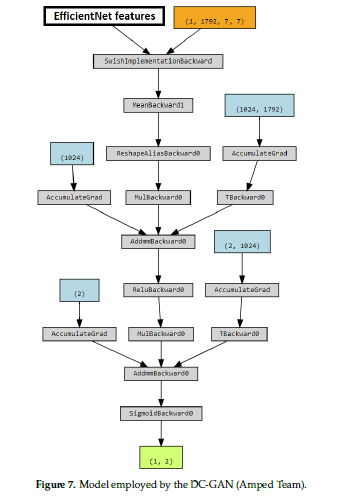

In [ ]:
from IPython.display import Image
Image('https://i.postimg.cc/sfLF2QRX/image.png')

## 5.1 EfficientNetB7 & ImageNet Base Model


In [ ]:
Base_model=EfficientNetB7(weights='imagenet',include_top=False,input_shape=[160,160,3])

258076736/258076736 [==============================] - 5s 0us/step


In [ ]:
Base_model.trainable=False

## 5.2 Input Layer

We will keep using the orginal model Input layer

## 5.3 Output Layer

In [ ]:
## Add Pooling layer
L=GlobalAveragePooling2D()(Base_model.output)


## Add Dropout to stop overfitting
L=Dropout(.5)(L)

## Output layer
output=Dense(2,activation='softmax')(L)

## 5.3 Ending Model

In [ ]:
DF_model=Model(inputs=Base_model.input, outputs=output)

In [ ]:
DF_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 160, 160, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 160, 160, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 160, 160, 3)  0           ['normalization[0][0]']      

## 5.4 Model Compile

In [ ]:
## Learning Rate for Optimizer
lr=.0001
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

In [ ]:
DF_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## 5.5 Model Train

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='DF_Best_model.h5',
                             verbose=1,
                             save_best_only=True,
                             monitor='val_loss'
                             )



start = datetime.now()

DF_model_history = DF_model.fit(
    train_generator,
    validation_data= val_generator,
    epochs=20,
    callbacks=[checkpoint], verbose=2
    )

duration = datetime.now() - start
print("training completed in time: ", duration)

Epoch 1/20


75/75 - 1676s - loss: 0.7806 - accuracy: 0.4915 - 1676s/epoch - 22s/step
Epoch 2/20


75/75 - 1584s - loss: 0.7798 - accuracy: 0.4910 - 1584s/epoch - 21s/step
Epoch 3/20


75/75 - 1626s - loss: 0.7695 - accuracy: 0.5015 - 1626s/epoch - 22s/step
Epoch 4/20


75/75 - 1599s - loss: 0.7610 - accuracy: 0.5035 - 1599s/epoch - 21s/step
Epoch 5/20


75/75 - 1638s - loss: 0.7635 - accuracy: 0.4952 - 1638s/epoch - 22s/step
Epoch 6/20


75/75 - 1571s - loss: 0.7548 - accuracy: 0.5121 - 1571s/epoch - 21s/step
Epoch 7/20


75/75 - 1600s - loss: 0.7535 - accuracy: 0.5013 - 1600s/epoch - 21s/step
Epoch 8/20


75/75 - 1583s - loss: 0.7556 - accuracy: 0.5019 - 1583s/epoch - 21s/step
Epoch 9/20


75/75 - 1565s - loss: 0.7661 - accuracy: 0.4804 - 1565s/epoch - 21s/step
Epoch 10/20


75/75 - 1591s - loss: 0.7650 - accuracy: 0.4791 - 1591s/epoch - 21s/step
Epoch 11/20


75/75 - 1516s - loss: 0.7504 - accuracy: 0.5046 - 1516s/epoch - 20s/step
Epoch 12/20


In [ ]:
import pandas as pd
Loss_fn=pd.DataFrame(DF_model_history)
plt.plot(Loss_fn)

NameError: ignored

# 6 Prediction

# 7 Evaluation

# 8 Used Libraries 

## 8.1 ImageDataGenerator

In the example below,
 
- We first define an ImageDataGenerator object datagen with various image transformation options.

- Then we define the directory containing our training images and create a generator train_generator that reads images from the directory and applies the transformations defined in datagen.

- We specify that we want to generate binary labels (0 or 1) using the class_mode parameter.

- Finally, we use train_generator to train our model using the fit method. The fit method will automatically read images from train_generator in batches, apply the specified transformations, and feed them to the model for training.

- When you use the flow_from_directory method of the ImageDataGenerator class, it reads images from the specified directory, preprocesses them based on the arguments you passed to the ImageDataGenerator, and returns an iterator that yields batches of image arrays and corresponding labels.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the ImageDataGenerator object
datagen = ImageDataGenerator(
    rescale=1./255,              # Rescale pixel values between 0 and 1
    rotation_range=30,           # Rotate images by up to 30 degrees
    width_shift_range=0.2,       # Shift images horizontally by up to 20%
    height_shift_range=0.2,      # Shift images vertically by up to 20%
    shear_range=0.2,             # Apply shear transformation
    zoom_range=0.2,              # Zoom in or out by up to 20%
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Fill any gaps created by transformations with the nearest pixel
)

# Define the directory containing your images
train_dir = 'path/to/train/directory'

# Create a generator that reads images from the directory and applies the transformations defined above
train_generator = datagen.flow_from_directory(
    train_dir,                  # Directory containing images
    target_size=(224, 224),     # Resizes images to 224x224 pixels
    batch_size=32,              # Number of images to include in each batch
    class_mode='binary'         # Generate binary labels (0 or 1)
)

# Train your model using the generator
model.fit(train_generator, epochs=10)

## 8.2 Transfer Learning Basics

1.base_model.trainable = False

base_model.trainable = False is a statement that freezes the layers of the base_model and makes them non-trainable during the subsequent training process.

- When a pre-trained model such as EfficientNetB7 is used, the weights of the model have already been trained on a large dataset (in the case of EfficientNetB7, on the ImageNet dataset), and these weights contain valuable information that can be useful for other similar tasks. By freezing the pre-trained layers, we prevent the optimizer from modifying these weights during training, so we can use them as a fixed feature extractor for our specific task.

- This can be beneficial in a couple of ways. First, it can save a significant amount of time and resources by avoiding the need to re-train the entire model from scratch. Second, by using a pre-trained model and freezing some of its layers, we can prevent overfitting to our specific dataset, especially if our dataset is relatively small, by using the generalization power of the pre-trained model.

2.include_top=False

include_top=False is an argument in the Keras EfficientNetB7 model constructor that specifies whether or not to include the fully connected layer at the top of the network.

- When include_top is set to True, the default, the fully connected layer is included in the model. This layer is responsible for mapping the features learned by the convolutional layers to the specific output classes of the model.

- When include_top is set to False, the fully connected layer is not included in the model. This can be useful when we want to use the convolutional base of a pre-trained model as a feature extractor for a different task, such as image captioning or object detection. In this case, we can add our own fully connected layer or other layers that are appropriate for the task we want to perform.


model = tf.keras.models.Model(inputs=base_model.input, outputs=output) is a statement that creates a new Keras Model object by specifying the inputs and outputs of the model.

- The inputs argument specifies the input tensor(s) of the model. In this case, base_model.input is used as the input tensor, which is the input to the first layer of the pre-trained EfficientNetB7 model.

- The outputs argument specifies the output tensor(s) of the model. In this case, output is used as the output tensor, which is the output of the custom output layer that we added.


## 8.3 ModelCheckPoint

ModelCheckpoint is a callback in Keras that allows you to save the weights of your model at specified intervals during training. 
- This is useful because it allows you to monitor the progress of your model over time and, in the event that your training is interrupted or crashes, you can resume training from the last saved checkpoint rather than starting over from scratch.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the file path for the saved model
filepath = "model_weights.h5"

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath,                   # File path for the saved model
    monitor='val_loss',         # Quantity to monitor (e.g. validation loss)
    save_best_only=True,        # Save only the best model based on the monitored quantity
    mode='min',                 # Minimize the monitored quantity (e.g. validation loss)
    verbose=1                   # Show progress updates
)

# Train the model and specify ModelCheckpoint as a callback
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[checkpoint]
)

In this example, we define the file path for the saved model as filepath. We then define the ModelCheckpoint callback by passing in various parameters:

filepath: the file path for the saved model
monitor: the quantity to monitor during training. In this example, we monitor the validation loss using 'val_loss'.
save_best_only: if True, the callback will only save the best model based on the monitored quantity. In this example, we only save the model if the validation loss is the lowest so far.
mode: specifies whether to minimize or maximize the monitored quantity. In this example, we want to minimize the validation loss, so we set mode='min'.
verbose: specifies how much progress information to display during training.
We then train our model using the fit method, and include checkpoint as a callback by passing it in as an element of a list of callbacks.

During training, ModelCheckpoint will save the model to filepath whenever the monitored quantity meets the specified conditions. By default, ModelCheckpoint will save the entire model, including the architecture and optimizer state, but you can also choose to save only the weights or only the architecture by passing in additional parameters to the ModelCheckpoint constructor.

## 8.4 keras-cv-attention-models

In [1]:
!pip install -U keras-cv-attention-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.3/617.3 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.0 MB/s eta 0:00:00


The Keras CV Attention model is a pre-trained model for image classification that can be used to classify images based on their content. The model uses attention mechanisms to focus on important features in the image.

Here is an example of how to use the Keras CV Attention model to classify an image:

In [ ]:
import cv2
import numpy as np
from tensorflow import keras

# Download the Keras CV Attention model
model = keras.models.load_model('cv_attention_model.h5')

# Load an image
img = cv2.imread('image.jpg')

# Resize the image to match the input shape of the model
img = cv2.resize(img, (224, 224))

# Convert the image to a NumPy array and normalize the pixel values
img = np.array(img) / 255.0

# Reshape the image to match the input shape of the model
img = np.reshape(img, (1, 224, 224, 3))

# Pass the image through the model to obtain the predicted class
pred = model.predict(img)

# Print the predicted class
print(pred)

<font color='blue' size='5px'/>Reem trial to Implement in Project<font/>